In [139]:
import numpy as np

In [140]:
from scipy.stats import norm

%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)

In [141]:
samples = np.concatenate([np.arange(0,105,5), 
                          10*np.arange(10,110,10),
                         100*np.arange(10,210,10)])

In [150]:
iterations = 500
means = np.zeros((iterations,len(samples)))
vsrs = np.zeros((iterations,len(samples)))

for i in np.arange(iterations):
    for j, s in enumerate(samples):
        
        N = norm.rvs(loc=0,scale=1,size=s)
        mu = np.mean(N)
        
        vr = ((N - mu)**2).sum()/(s-1)

        means[i,j] = mu
        vsrs[i,j] = vr

/Users/kristianeschenburg/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/kristianeschenburg/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


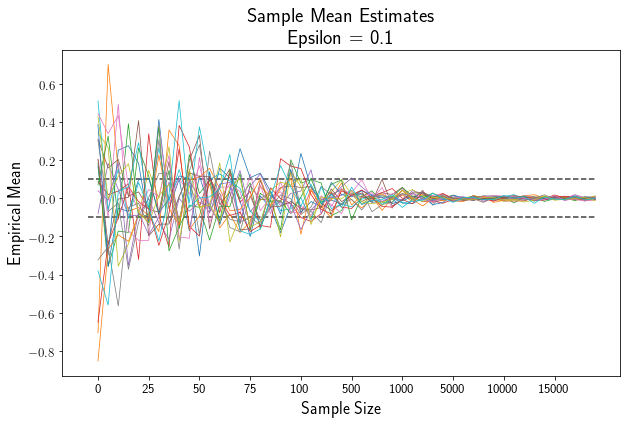

In [164]:
fig = plt.figure(figsize=(10,6))
for s in np.arange(int(means.shape[0]/25)):
    plt.plot(means[s,:], linewidth=0.75);
    
plt.hlines(y=0.1,xmin = 0, xmax = 50, linestyles='--', alpha = 0.75)
plt.hlines(y=-0.1,xmin = 0, xmax = 50, linestyles='--', alpha = 0.75)
    
plt.title('Sample Mean Estimates \n Epsilon = 0.1', fontsize=20);
plt.xlabel('Sample Size', fontsize=17);
plt.xticks(np.arange(1,51,5), samples[np.arange(0,50,5)],fontsize=13)
plt.ylabel('Empirical Mean', fontsize=17);
plt.yticks(fontsize=13);

plt.savefig('/Users/kristianeschenburg/Documents/Code/kristianeschenburg.github.io/figures/WLLN_Mean.jpg')

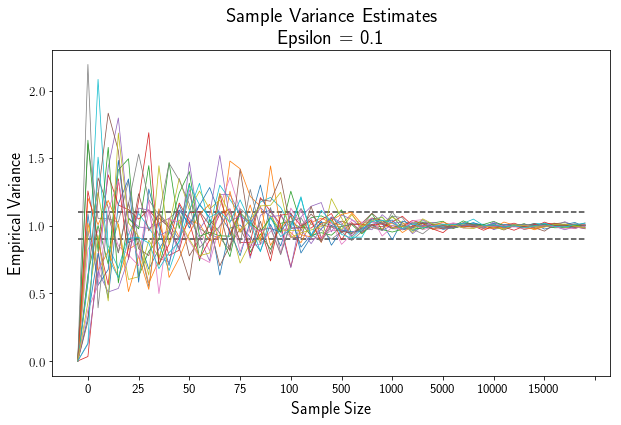

In [165]:
fig = plt.figure(figsize=(10,6))
for s in np.arange(int(sds.shape[0]/25)):
    plt.plot(vsrs[s,:],linewidth=0.75);
    
plt.hlines(y=1.1, xmin = 0, xmax = 50, linestyles='--', alpha = 0.75)
plt.hlines(y=.9, xmin = 0, xmax = 50, linestyles='--', alpha = 0.75)
    
plt.title('Sample Variance Estimates \n Epsilon = 0.1', fontsize=20);
plt.xlabel('Sample Size',fontsize=17);
plt.xticks(np.arange(1,52,5),samples[np.arange(0,50,5)],fontsize=13)
plt.ylabel('Empirical Variance',fontsize=17);
plt.yticks(fontsize=13);

plt.savefig('/Users/kristianeschenburg/Documents/Code/kristianeschenburg.github.io/figures/WLLN_Variance.jpg')

In [166]:
def ecdf(data, pparam, epsilon):
    
    """
    Compute empirical probability P( |estimate - population parameter| < epsilon).
    
    Parameters:
    - - - - -
    data: array, float
        array of samples
    pparam: float
        true population parameter
    epsilon: float
        threshold value
    """
    
    compare = (np.abs(data - pparam) < epsilon)
    prob = compare.mean(0)
    
    return prob
    

In [167]:
e = [0.9, 0.75, 0.5, 0.25, 0.1, 0.05, 0.01]

mean_probs = []
vrs_probs = []
for E in e:
    mean_probs.append(1 - ecdf(means, pparam = 0, epsilon=E))
    vrs_probs.append(1-ecdf(vsrs, pparam=1,epsilon=E))

/Users/kristianeschenburg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


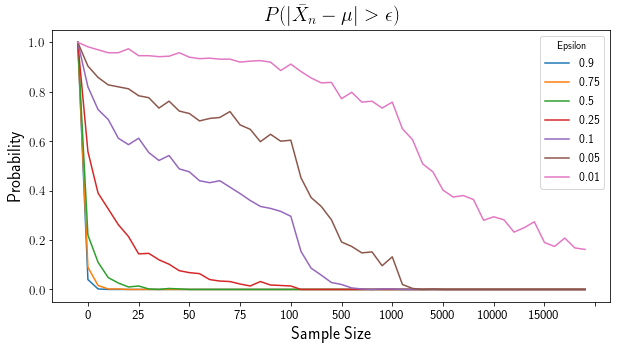

In [168]:
fig = plt.figure(figsize=(10,5))
for eps,mn in zip(e,mean_probs):
    plt.plot(mn,label=eps)
    
plt.title(r'$P(|\bar{X}_{n} - \mu| > \epsilon )$', fontsize=20);

plt.xlabel('Sample Size',fontsize=17);
plt.xticks(np.arange(1,52,5),samples[np.arange(0,50,5)],fontsize=13);
plt.ylabel('Probability',fontsize=17);
plt.yticks(fontsize=13)

plt.legend(title="Epsilon",fontsize='large');
plt.savefig('/Users/kristianeschenburg/Documents/Code/kristianeschenburg.github.io/figures/ECDF_Mean.jpg')

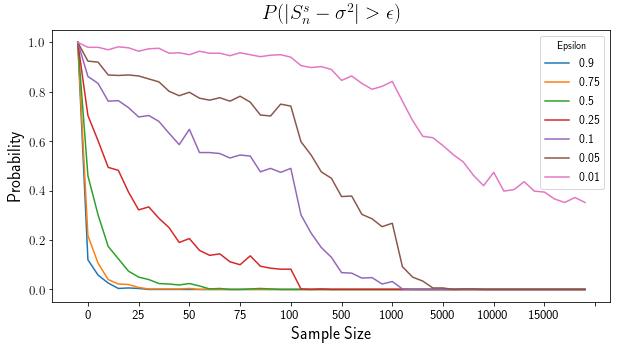

In [169]:
fig = plt.figure(figsize=(10,5))
for eps,vr in zip(e,vrs_probs):
    plt.plot(vr,label=eps)

plt.title(r'$P(|S^{s}_{n} - \sigma^{2}| > \epsilon )$', fontsize=20);
plt.xlabel('Sample Size',fontsize=17);
plt.xticks(np.arange(1,52,5),samples[np.arange(0,50,5)],fontsize=13);
plt.ylabel('Probability',fontsize=17);
plt.yticks(fontsize=13)

plt.legend(title="Epsilon",fontsize='large');
plt.savefig('/Users/kristianeschenburg/Documents/Code/kristianeschenburg.github.io/figures/ECDF_Variance.jpg')